## Week 3 Assignment
#### Author: Jiaqi Li
#### Description: Race of the population in Chinatown, Lincoln Heights, Echo Park, and Elysian Park by block group

In [1]:
# import libraries
import pandas
import geopandas

In [2]:
# import dataset
datarace = pandas.read_csv('census_race_full.csv')

We will inspect the data and eliminate unnecessary columns in the following section.

In [3]:
# take a look at the data
datarace.shape

(2498, 84)

In [4]:
datarace.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_A03001B_001,SE_A03001B_002,SE_A03001B_003,SE_A03001B_004,SE_A03001B_005,SE_A03001B_006,SE_A03001B_007,SE_A03001B_008,SE_A03001B_009,SE_A03001B_010
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,644,438,0,0,58,0,52,96,372,207
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,344,287,0,0,0,0,33,24,287,33
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,762,450,8,16,48,0,110,130,394,285
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,1140,815,68,0,25,0,178,54,747,269
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,816,715,17,0,28,17,28,11,515,239


In [5]:
# look at the data types
datarace.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Geo_FIPS        2498 non-null   int64  
 1   Geo_QName       2498 non-null   object 
 2   Geo_FILEID      2498 non-null   object 
 3   Geo_STUSAB      2498 non-null   object 
 4   Geo_SUMLEV      2498 non-null   int64  
 5   Geo_GEOCOMP     2498 non-null   int64  
 6   Geo_LOGRECNO    2498 non-null   int64  
 7   Geo_US          0 non-null      float64
 8   Geo_REGION      0 non-null      float64
 9   Geo_DIVISION    0 non-null      float64
 10  Geo_STATECE     0 non-null      float64
 11  Geo_STATE       2498 non-null   int64  
 12  Geo_COUNTY      2498 non-null   int64  
 13  Geo_COUSUB      0 non-null      float64
 14  Geo_PLACE       0 non-null      float64
 15  Geo_TRACT       2498 non-null   int64  
 16  Geo_BLKGRP      0 non-null      float64
 17  Geo_CONCIT      0 non-null      f

In [6]:
#fixing the code issue by turning FIPS into string
datarace = pandas.read_csv(
    'census_race_full.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)
datarace.sample()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_A03001B_001,SE_A03001B_002,SE_A03001B_003,SE_A03001B_004,SE_A03001B_005,SE_A03001B_006,SE_A03001B_007,SE_A03001B_008,SE_A03001B_009,SE_A03001B_010
1726,06037534302,"Census Tract 5343.02, Los Angeles County, Cali...",ACSSF,ca,140,0,5926,NaN,NaN,NaN,...,744,384,6,0,4,0,175,175,0,734


In [7]:
#checking datatype of the new frames
datarace.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Geo_FIPS        2498 non-null   object 
 1   Geo_QName       2498 non-null   object 
 2   Geo_FILEID      2498 non-null   object 
 3   Geo_STUSAB      2498 non-null   object 
 4   Geo_SUMLEV      2498 non-null   int64  
 5   Geo_GEOCOMP     2498 non-null   int64  
 6   Geo_LOGRECNO    2498 non-null   int64  
 7   Geo_US          0 non-null      float64
 8   Geo_REGION      0 non-null      float64
 9   Geo_DIVISION    0 non-null      float64
 10  Geo_STATECE     0 non-null      float64
 11  Geo_STATE       2498 non-null   object 
 12  Geo_COUNTY      2498 non-null   object 
 13  Geo_COUSUB      0 non-null      float64
 14  Geo_PLACE       0 non-null      float64
 15  Geo_TRACT       2498 non-null   int64  
 16  Geo_BLKGRP      0 non-null      float64
 17  Geo_CONCIT      0 non-null      f

In [8]:
#eliminating empty rows and columns
datarace.columns[datarace.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [9]:
# creating new dataframe that does not include empty rows
datarace1 = datarace.dropna(axis=1,how='all')

In [10]:
# reinspecting data
datarace1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Geo_FIPS        2498 non-null   object
 1   Geo_QName       2498 non-null   object
 2   Geo_FILEID      2498 non-null   object
 3   Geo_STUSAB      2498 non-null   object
 4   Geo_SUMLEV      2498 non-null   int64 
 5   Geo_GEOCOMP     2498 non-null   int64 
 6   Geo_LOGRECNO    2498 non-null   int64 
 7   Geo_STATE       2498 non-null   object
 8   Geo_COUNTY      2498 non-null   object
 9   Geo_TRACT       2498 non-null   int64 
 10  Geo_GEOID       2498 non-null   object
 11  Geo_NAME        2498 non-null   object
 12  SE_A00001_001   2498 non-null   int64 
 13  SE_A03001_001   2498 non-null   int64 
 14  SE_A03001_002   2498 non-null   int64 
 15  SE_A03001_003   2498 non-null   int64 
 16  SE_A03001_004   2498 non-null   int64 
 17  SE_A03001_005   2498 non-null   int64 
 18  SE_A0300

In [11]:
datarace1.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,...,SE_A03001B_001,SE_A03001B_002,SE_A03001B_003,SE_A03001B_004,SE_A03001B_005,SE_A03001B_006,SE_A03001B_007,SE_A03001B_008,SE_A03001B_009,SE_A03001B_010
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,06,037,101110,...,644,438,0,0,58,0,52,96,372,207
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,06,037,101122,...,344,287,0,0,0,0,33,24,287,33
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,06,037,101220,...,762,450,8,16,48,0,110,130,394,285
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,06,037,101221,...,1140,815,68,0,25,0,178,54,747,269
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,06,037,101222,...,816,715,17,0,28,17,28,11,515,239


#### Strimming the dataset
Next, we would like to get three datasets containing information on 'race in general', 'race by households', 'race of renters'. 
##### On my laptop, the data dictionary cannot be downloaded. 

Therefore, I have used the social explorer online dictionary for reference here:https://www.socialexplorer.com/data/ACS2021_5yr/metadata/?ds=SE

- Geo_FIPS
- SE_A03001_001: Total Population
- SE_A03001_002: White Alone
- SE_A03001_003: Black or African American Alone
- SE_A03001_004: American Indian and Alaska Native Alone
- SE_A03001_005: Asian Alone
- SE_A03001_006: Native Hawaiian and Other Pacific Islander Alone
- SE_A03001_007: Some Other Race Alone
- SE_A03001_008: Two or More Races

- A10010_001: Households
- A10010_002: With a Householder Who Is White Alone
- A10010_003: With a Householder Who Is Black or African American Alone
- A10010_004: With a Householder Who Is American Indian and Alaska Native Alone
- A10010_005: With a Householder Who Is Asian Alone
- A10010_006: With a Householder Who Is Native Hawaiian and Other Pacific Islander Alone
- A10010_007: With a Householder Who Is Some Other Race Alone
- A10010_008: With a Householder Who Is Two or More Races
- A10010_009: With a Householder Who Is Hispanic or Latino
- A10010_010: With a Householder Who Is White Alone, Not Hispanic or Latino

- A03001B_001: Renter-Occupied Housing Units
- A03001B_002: White Alone Householder
- A03001B_003: Black or African American Alone Householder
- A03001B_004: American Indian and Alaska Native Alone Householder
- A03001B_005: Asian Alone Householder
- A03001B_006: Native Hawaiian and Other Pacific Islander Alone Householder
- A03001B_007: Some Other Race Alone Householder
- A03001B_008: Two or More Races Householder
- A03001B_009: White Alone, Not Hispanic or Latino Householder
- A03001B_010: Hispanic or Latino Householder

#### dataset 1 for 'race in general'
In the following section, we adopt the same method to get the desired datasets.
1. Define new data frame with necessary columns to keep
2. Add them to a new dataframe
3. Grab the list of columns
4. Rename the columns by categories of race
5. Reinspect the dataset

In [12]:
# dataset 1, define new data frame with necessary columns to keep, for race in general
columns_to_keep = ['Geo_FIPS',
                   'SE_A03001_001',
                   'SE_A03001_002',
                   'SE_A03001_003',
                   'SE_A03001_004',
                   'SE_A03001_005',
                   'SE_A03001_006',
                   'SE_A03001_007',
                   'SE_A03001_008',]
# add it to a new dataframe
drnew = datarace1[columns_to_keep].copy()

In [13]:
# grabbing the list of columns
drnew.columns.to_list()

['Geo_FIPS',
 'SE_A03001_001',
 'SE_A03001_002',
 'SE_A03001_003',
 'SE_A03001_004',
 'SE_A03001_005',
 'SE_A03001_006',
 'SE_A03001_007',
 'SE_A03001_008']

In [14]:
#Replacing the values with new column names 
drnew.columns = ['FIPS',
                'TotalPop',
                'White Alone',
                'Black or African American Alone',
                'American Indian and Alaska Native Alone',
                'Asian Alone',
                'Native Hawaiian and Pacific Islander Alone',
                'Some Other Alone',
                'Two or More Races']

In [15]:
# Reinspect the dataframe for race alone
drnew.head(3)

,FIPS,TotalPop,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Pacific Islander Alone,Some Other Alone,Two or More Races
0,06037101110,3879,2709,11,6,405,0,266,482
1,06037101122,4247,2980,99,0,607,0,245,316
2,06037101220,3583,1978,8,90,341,0,607,559


#### dataset 2, for 'race of householders'

In [16]:
# dataset 2, for race of householders
# Reinspect the original large dataset
datarace1.head(1)

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,...,SE_A03001B_001,SE_A03001B_002,SE_A03001B_003,SE_A03001B_004,SE_A03001B_005,SE_A03001B_006,SE_A03001B_007,SE_A03001B_008,SE_A03001B_009,SE_A03001B_010
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,06,037,101110,...,644,438,0,0,58,0,52,96,372,207


In [17]:
# define new data frame with necessary columns to keep, 
columns_to_keep2 = ['Geo_FIPS',
                   'SE_A10010_001',
                   'SE_A10010_002',
                   'SE_A10010_003',
                   'SE_A10010_004',
                   'SE_A10010_005',
                   'SE_A10010_006',
                   'SE_A10010_007',
                   'SE_A10010_008',
                   'SE_A10010_009',
                   'SE_A10010_010']
# add it to a new dataframe
dr_householder = datarace1[columns_to_keep2].copy()

In [18]:
# grabbing the list of columns
dr_householder.columns.to_list()

['Geo_FIPS',
 'SE_A10010_001',
 'SE_A10010_002',
 'SE_A10010_003',
 'SE_A10010_004',
 'SE_A10010_005',
 'SE_A10010_006',
 'SE_A10010_007',
 'SE_A10010_008',
 'SE_A10010_009',
 'SE_A10010_010']

In [19]:
#Replacing the values with new column names 
dr_householder.columns = [
                'FIPS',
                'Households',
                'With a Householder Who Is White Alone',
                'With a Householder Who Is Black or African American Alone',
                'With a Householder Who Is American Indian and Alaska Native Alone',
                'With a Householder Who Is Asian Alone',
                'With a Householder Who Is Native Hawaiian and Pacific Islander Alone',
                'With a Householder Who Is Some Other Alone',
                'With a Householder Who Is Two or More Races',
                'With a Householder Who Is Hispanic or Latino',
                'With a Householder Who Is White Alone, Not Hispanic or Latino',]
# Reinspect the dataframe for race alone
dr_householder.head(3)

,FIPS,Households,With a Householder Who Is White Alone,With a Householder Who Is Black or African American Alone,With a Householder Who Is American Indian and Alaska Native Alone,With a Householder Who Is Asian Alone,With a Householder Who Is Native Hawaiian and Pacific Islander Alone,With a Householder Who Is Some Other Alone,With a Householder Who Is Two or More Races,With a Householder Who Is Hispanic or Latino,"With a Householder Who Is White Alone, Not Hispanic or Latino"
0,06037101110,1494,1105,0,0,92,0,88,209,401,951
1,06037101122,1372,1064,10,0,136,0,57,105,89,1045
2,06037101220,1357,785,8,25,187,0,148,204,497,589


#### dataset 3, for 'race of renters'

In [20]:
# dataset 3, for race of renters
# Reinspect the original large dataset
datarace1.head(1)

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,...,SE_A03001B_001,SE_A03001B_002,SE_A03001B_003,SE_A03001B_004,SE_A03001B_005,SE_A03001B_006,SE_A03001B_007,SE_A03001B_008,SE_A03001B_009,SE_A03001B_010
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,06,037,101110,...,644,438,0,0,58,0,52,96,372,207


In [21]:
# define new data frame with necessary columns to keep, 
columns_to_keep3 = ['Geo_FIPS',
                   'SE_A03001B_001',
                   'SE_A03001B_002',
                   'SE_A03001B_003',
                   'SE_A03001B_004',
                   'SE_A03001B_005',
                   'SE_A03001B_006',
                   'SE_A03001B_007',
                   'SE_A03001B_008',
                   'SE_A03001B_009',
                   'SE_A03001B_010']
# add it to a new dataframe
dr_renter = datarace1[columns_to_keep3].copy()

In [22]:
# grabbing the list of columns
dr_renter.columns.to_list()

['Geo_FIPS',
 'SE_A03001B_001',
 'SE_A03001B_002',
 'SE_A03001B_003',
 'SE_A03001B_004',
 'SE_A03001B_005',
 'SE_A03001B_006',
 'SE_A03001B_007',
 'SE_A03001B_008',
 'SE_A03001B_009',
 'SE_A03001B_010']

In [23]:
#Replacing the values with new column names 
dr_renter.columns = [
                'FIPS',
                'Renter-Occupied Housing Units',
                'White Alone Renter',
                'Black or African American Alone Renter',
                'American Indian and Alaska Native Alone Renter',
                'Asian Alone Renter',
                'Native Hawaiian and Pacific Islander Alone Renter',
                'Some Other Alone Renter',
                'Two or More Races Renter',
                'White Alone, Not Hispanic or Latino Renter',
                'Hispanic or Latino Renter',]
# Reinspect the dataframe for race alone
dr_renter.head(3)

,FIPS,Renter-Occupied Housing Units,White Alone Renter,Black or African American Alone Renter,American Indian and Alaska Native Alone Renter,Asian Alone Renter,Native Hawaiian and Pacific Islander Alone Renter,Some Other Alone Renter,Two or More Races Renter,"White Alone, Not Hispanic or Latino Renter",Hispanic or Latino Renter
0,06037101110,644,438,0,0,58,0,52,96,372,207
1,06037101122,344,287,0,0,0,0,33,24,287,33
2,06037101220,762,450,8,16,48,0,110,130,394,285


I am not sure if merging data will be useful in the later section, so just out of curiosity, I will merge the 'race by householders' dataset and the 'race of renters' dataset together.

In [24]:
# Merging new datasets together
dr_merged = dr_householder.merge(dr_renter, on='FIPS')
dr_merged.sample(3)

,FIPS,Households,With a Householder Who Is White Alone,With a Householder Who Is Black or African American Alone,With a Householder Who Is American Indian and Alaska Native Alone,With a Householder Who Is Asian Alone,With a Householder Who Is Native Hawaiian and Pacific Islander Alone,With a Householder Who Is Some Other Alone,With a Householder Who Is Two or More Races,With a Householder Who Is Hispanic or Latino,...,Renter-Occupied Housing Units,White Alone Renter,Black or African American Alone Renter,American Indian and Alaska Native Alone Renter,Asian Alone Renter,Native Hawaiian and Pacific Islander Alone Renter,Some Other Alone Renter,Two or More Races Renter,"White Alone, Not Hispanic or Latino Renter",Hispanic or Latino Renter
524,06037197300,1778,1170,23,0,242,38,241,64,387,...,1298,844,23,0,151,38,194,48,805,253
2448,06037920330,1731,1453,66,0,117,0,17,78,267,...,611,513,37,0,32,0,8,21,421,100
1540,06037481603,1151,177,0,24,717,36,152,45,255,...,581,113,0,24,246,36,117,45,57,206


The above section works.

#### General Plotting

Now we import the census tracts dataset with spatial component in it. I want to plot the race information on a map.

In [25]:
# read in a geojson file downloaded from the LA Times
tracts=geopandas.read_file('Census_Tracts_2020.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<AxesSubplot: >

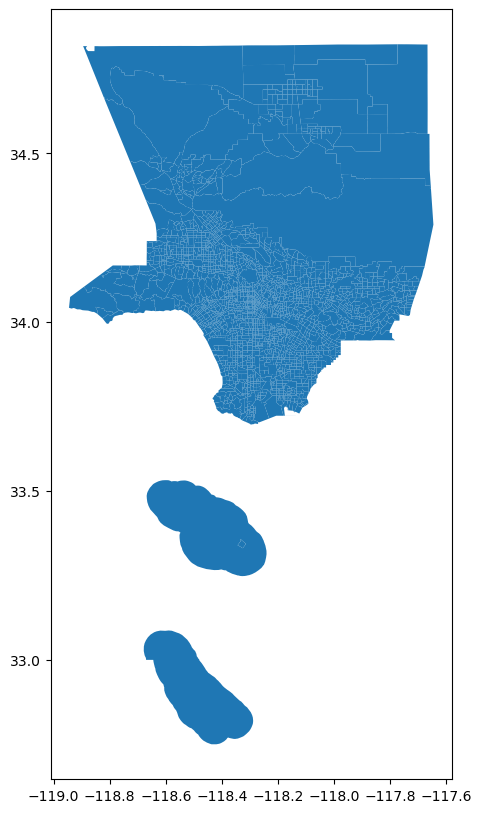

In [26]:
# plot it
tracts.plot(figsize=(12,10))

In [27]:
# info of the dataset
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


We only want to keep the geographic information which is useful. Therefore, first we keep the useful columns, and then we fix the leading zero dilemma by creating a FIPS column.

In [28]:
# subsetting the data
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [29]:
# create a FIPS column
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [30]:
# create a new dataframe based on the joined Geo_FIPS
tracts_race=tracts.merge(dr_renter,on="FIPS")
tracts_race.head(3)

,CT20,geometry,FIPS,Renter-Occupied Housing Units,White Alone Renter,Black or African American Alone Renter,American Indian and Alaska Native Alone Renter,Asian Alone Renter,Native Hawaiian and Pacific Islander Alone Renter,Some Other Alone Renter,Two or More Races Renter,"White Alone, Not Hispanic or Latino Renter",Hispanic or Latino Renter
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,644,438,0,0,58,0,52,96,372,207
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,344,287,0,0,0,0,33,24,287,33
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,762,450,8,16,48,0,110,130,394,285


We have successfully created a merged data set containing 'race of renters' information.

Now we can try to make a map for Asian alone renters in the LA area.

<AxesSubplot: >

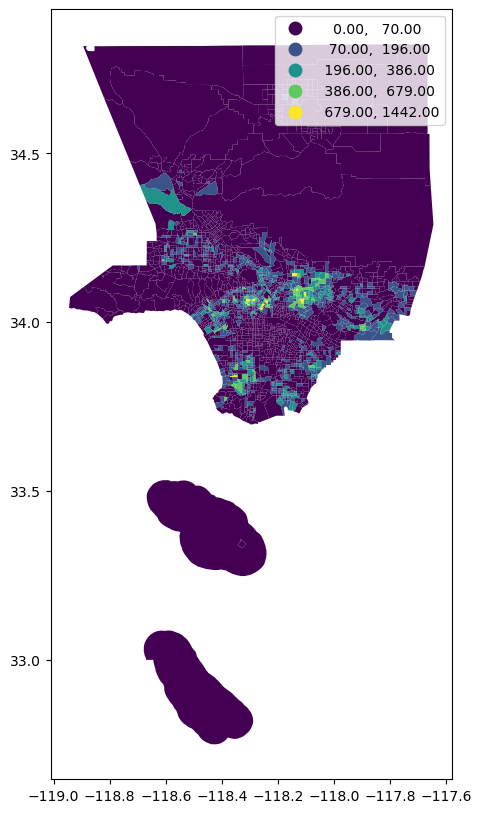

In [31]:
# making a map for Asian alone renter in the LA area.
tracts_race.plot(figsize=(12,10),
                 column='Asian Alone Renter',
                 legend=True, 
                 scheme='NaturalBreaks')

That works.

Now we try to plot the map in different ways, by showing the percentage of renters of different race. Here I include the most relevant races: Hispanic or Latino, White Alone, Asian Alone.

In [32]:
# create new columns for percentages
tracts_race['PCT_HisLat'] = tracts_race['Hispanic or Latino Renter']/tracts_race['Renter-Occupied Housing Units']*100
tracts_race['PCT_White'] = tracts_race['White Alone Renter']/tracts_race['Renter-Occupied Housing Units']*100
tracts_race['PCT_Asian'] = tracts_race['Asian Alone Renter']/tracts_race['Renter-Occupied Housing Units']*100
tracts_race.head(3)

,CT20,geometry,FIPS,Renter-Occupied Housing Units,White Alone Renter,Black or African American Alone Renter,American Indian and Alaska Native Alone Renter,Asian Alone Renter,Native Hawaiian and Pacific Islander Alone Renter,Some Other Alone Renter,Two or More Races Renter,"White Alone, Not Hispanic or Latino Renter",Hispanic or Latino Renter,PCT_HisLat,PCT_White,PCT_Asian
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,644,438,0,0,58,0,52,96,372,207,32.142857,68.012422,9.006211
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,344,287,0,0,0,0,33,24,287,33,9.593023,83.430233,0.000000
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,762,450,8,16,48,0,110,130,394,285,37.401575,59.055118,6.299213


<AxesSubplot: >

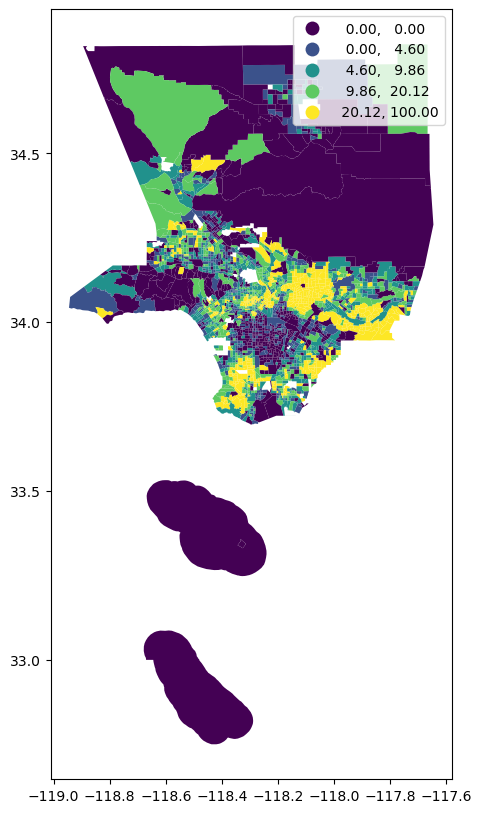

In [33]:
# Plot percentage of Asian renters in the LA area in quantiles

tracts_race.plot(figsize=(12,10),
                 column='PCT_Asian',
                 legend=True, 
                 scheme='quantiles')

<AxesSubplot: >

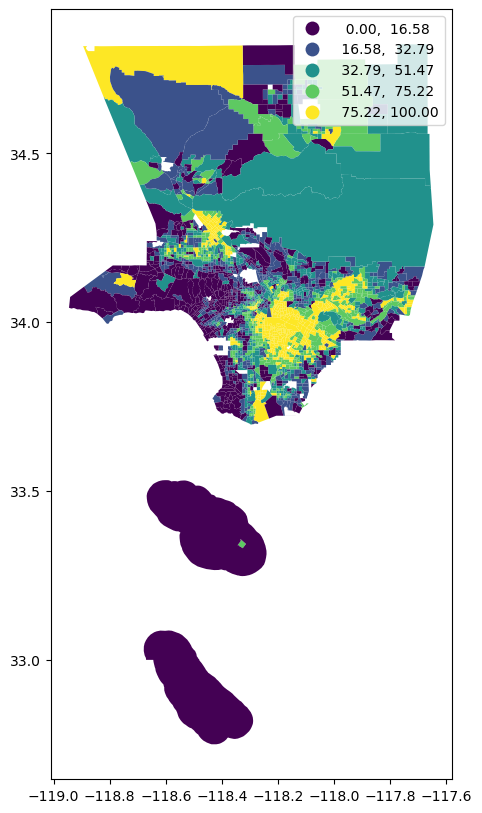

In [34]:
# Plot percentage of Hispanic or Latino renters in the LA area in quantiles

tracts_race.plot(figsize=(12,10),
                 column='PCT_HisLat',
                 legend=True, 
                 scheme='quantiles')

<AxesSubplot: >

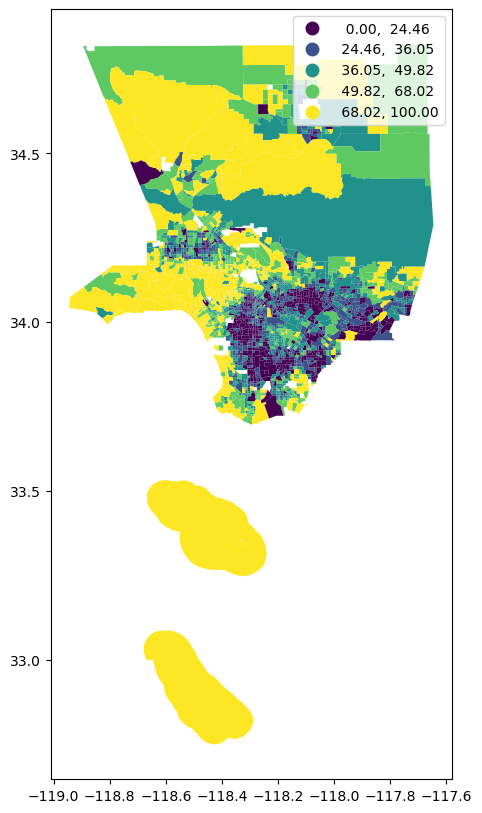

In [35]:
# Plot percentage of white renters in the LA area in quantiles

tracts_race.plot(figsize=(12,10),
                 column='PCT_White',
                 legend=True, 
                 scheme='quantiles')

#### Clipping neighborhoods for the scope of our research

Now we want to make maps relevant to our research idea on gentrification and displacement in Chinatown and its adjacent areas. Therefore, we want to visualize the above information on a clipped map including Chinatown, Lincoln heights, elysian park, and echo park.

In [36]:
# clip only for neighborhoods chinatown, lincoln heights, elysian park, and echo park
neighborhoods = geopandas.read_file('LA_Times_Neighborhood_Boundaries.geojson')

<AxesSubplot: >

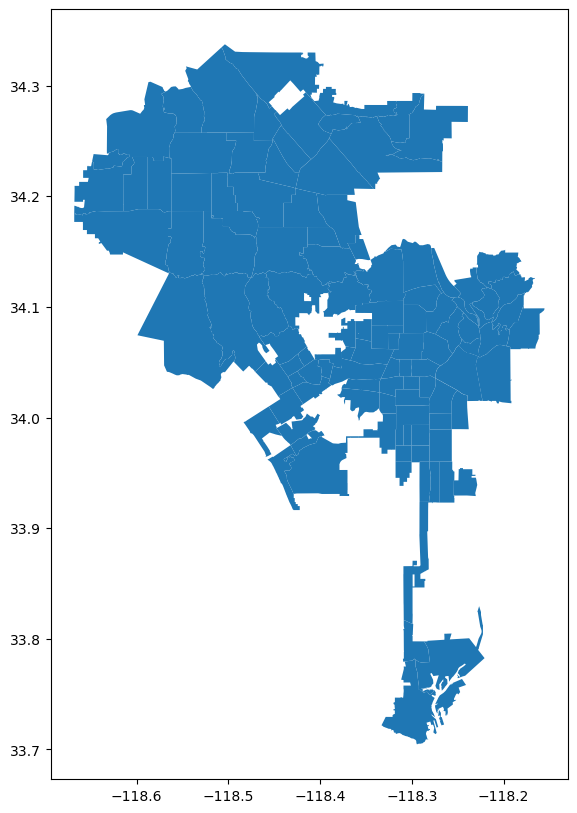

In [37]:
# Plot
neighborhoods.plot(figsize=(12,10))

In [38]:
# Inspect the dataset
neighborhoods.sample(3)

,OBJECTID,name,geometry
31,32,Exposition Park,"POLYGON ((-118.29155 34.01837, -118.28294 34.0..."
93,94,University Park,"POLYGON ((-118.27986 34.01848, -118.28294 34.0..."
88,89,Sun Valley,"POLYGON ((-118.39006 34.25221, -118.36649 34.2..."


In [39]:
# Selecting the neighborhoods
relevant_neighborhoods = set(('Echo Park','Lincoln Heights','Chinatown','Elysian Park'))
clipped_neighborhoods = neighborhoods.loc[neighborhoods['name'].isin(relevant_neighborhoods)] 
clipped_neighborhoods.head()

,OBJECTID,name,geometry
20,21,Chinatown,"POLYGON ((-118.22473 34.06758, -118.22703 34.0..."
26,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0..."
28,29,Elysian Park,"POLYGON ((-118.24246 34.09391, -118.24057 34.0..."
56,57,Lincoln Heights,"POLYGON ((-118.21218 34.08389, -118.21194 34.0..."


In [40]:
# define the clipped area
tracts_rentrace_clipped = geopandas.clip(tracts_race, clipped_neighborhoods)

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

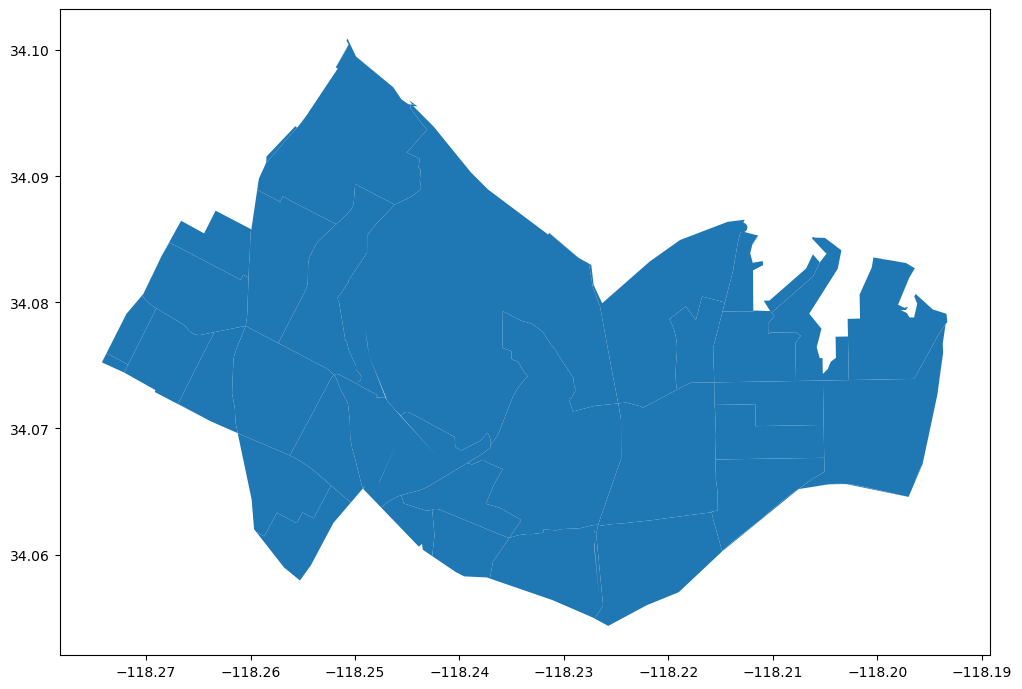

In [41]:
# plot the clipping area
tracts_rentrace_clipped.plot(figsize=(12,10))

Now we want to visualize the information in a lively way. I will compare the map of 'Asian Alone Renters' and 'Hispanic and Latino Renters' for now.

<AxesSubplot: >

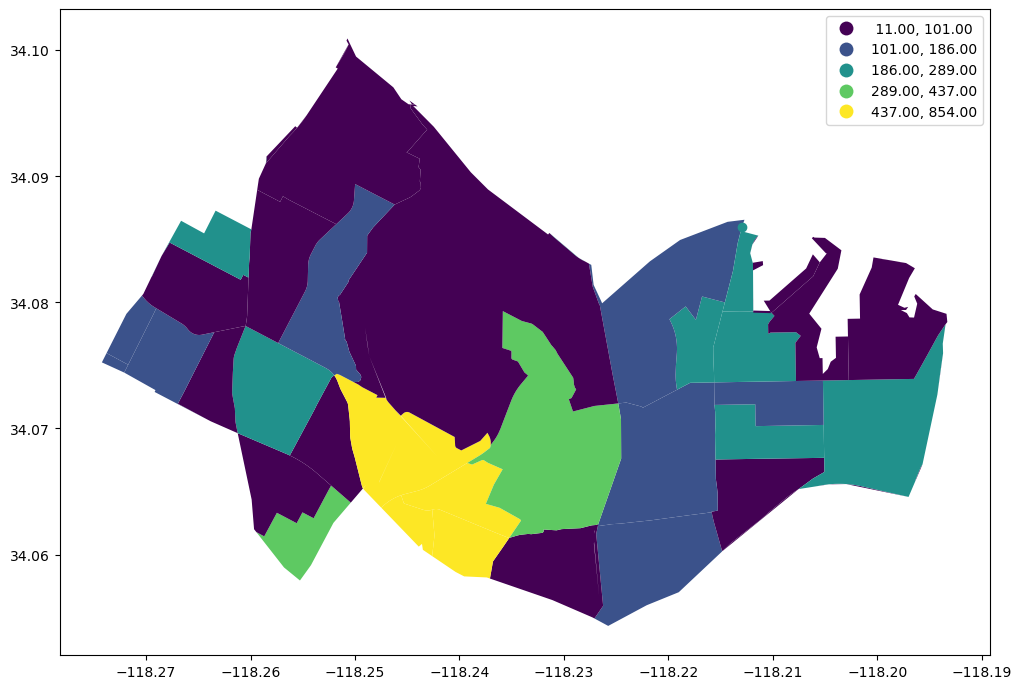

In [42]:
# visualize the Asian alone renters in the four areas of interests
import folium
tracts_rentrace_clipped.plot(figsize=(12,10),
                 column='Asian Alone Renter',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot: >

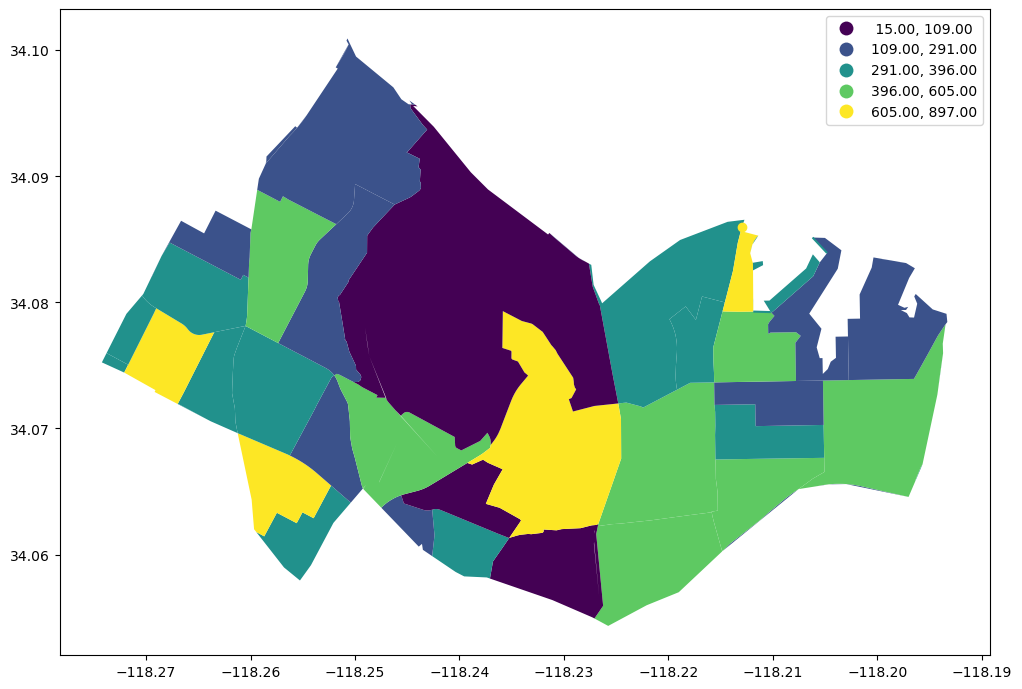

In [43]:
# visualize the Hispanic or Latino renters in the four areas of interests
tracts_rentrace_clipped.plot(figsize=(12,10),
                 column='Hispanic or Latino Renter',
                 legend=True, 
                 scheme='NaturalBreaks')

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1415: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


<AxesSubplot: >

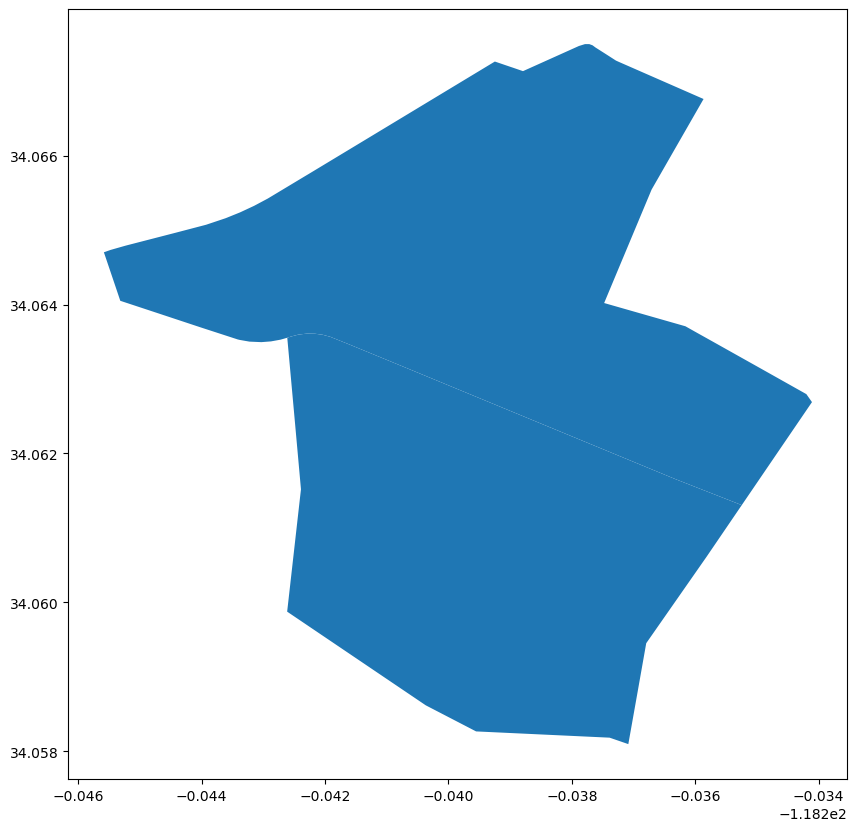

In [44]:
# Figure out what is the area that has a population of Asian renters over 50%
tracts_rentrace_clipped[tracts_race.PCT_Asian > 50].plot(figsize=(12,10))

The above map corresponds to the shape of central low areas in the previous 'clipped areas of interests'.

We also want to figure out the areas for Hispanic or Latino population.

<AxesSubplot: >

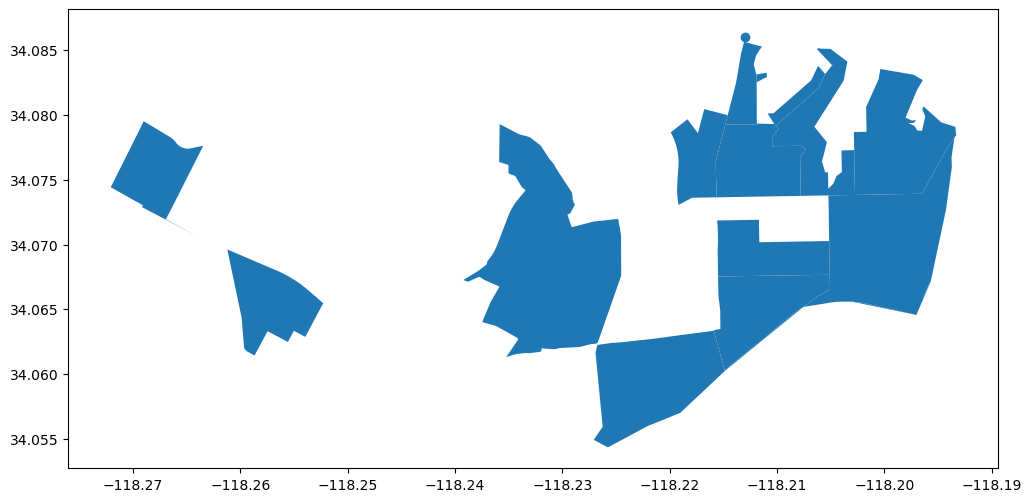

In [45]:
# Figure out what is the area that has a population of Hispanic or latino renters over 50%
tracts_rentrace_clipped[tracts_race.PCT_HisLat > 50].plot(figsize=(12,10))

#### Visualization on an interactive map

The next section explores how to visualize the wanted information on an interactive map.
First, we figure out the longitude and latitude of the areas of interests.

In [46]:
# creating choropleth map with the data and clipped maps

lat = tracts_rentrace_clipped.geometry.centroid.x.mean()
long = tracts_rentrace_clipped.geometry.centroid.y.mean()
print(lat,long)

-118.23536765631414 34.07330213724232


/tmp/ipykernel_1984/4244515340.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lat = tracts_rentrace_clipped.geometry.centroid.x.mean()
/tmp/ipykernel_1984/4244515340.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  long = tracts_rentrace_clipped.geometry.centroid.y.mean()


In [47]:
# Then we create the base map 1
m = folium.Map(location=[long,lat], 
               zoom_start = 10,
               tiles='CartoDB positron', 
               attribution='CartoDB')
m

In [48]:
# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_rentrace_clipped, # geo data
                  data=tracts_rentrace_clipped, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'PCT_Asian'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Asian Alone Renter').add_to(m)    # name on the legend color bar
m

In [49]:
m.save('Chinatown_adjacent_neighborhoods_Asian.html')

The first map will be the distribution of Asian alone renters in the four areas of interests!

We also want a second map of Hispanic and Latino renters in these four areas.

In [50]:
# create a second base map
m2 = folium.Map(location=[long,lat], 
               zoom_start = 10,
               tiles='CartoDB positron', 
               attribution='CartoDB')
m2

In [51]:
# plot chorpleth over the base map 2, for the reference of His/Lat renters
folium.Choropleth(
                  geo_data=tracts_rentrace_clipped, # geo data
                  data=tracts_rentrace_clipped, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'PCT_HisLat'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Hispanic or Latino Renter').add_to(m2)    # name on the legend color bar
m2

In [52]:
m2.save('Chinatown_adjacent_neighborhoods_Asian.html')

In the end, we have got two interactive maps showing the distribution of Asian and Hispanic/Latino renters in the four areas of interests: Chinatown, Lincoln heights, elysian park, and echo park.